In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree, metrics
import matplotlib.pyplot as plt
%matplotlib inline

#### Import 'tennis-time.csv' into a dataframe and examine it.

**The object of this exercise is to use Decision Tree Regression to predict the time spent playing tennis based on weather conditions.**

[tennis-time.csv](https://drive.google.com/file/d/1-qFC0y6j6DZ2ApKX5lwtC8iReKsc0rAs/view?usp=sharing)

In [2]:
# Load 'tennis-time.csv' into a dataframe
df = pd.read_csv("data/tennis-time.csv")
df.head()

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62


#### Notice that the features (except for play time) are all text labels.  We need to convert them into numeric values. ####

The tool we will use is sci-kit's LabelEncoder (imported above).  The two cells below illustrate the use of LabelEncoder.

Use the LabelEncoder to encode all of the text labels in your dataframe.

In [3]:

LabelEncoder().fit(df['outlook']).classes_
# Encode categorical variables
df['outlook'] = LabelEncoder().fit_transform(df['outlook'])
df['temp'] = LabelEncoder().fit_transform(df['temp'])
df['humidity'] = LabelEncoder().fit_transform(df['humidity'])
df['windy'] = LabelEncoder().fit_transform(df['windy'])




In [4]:
LabelEncoder().fit_transform(df['outlook'])

df.head()



,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62


#### Split the dataframe into X and y and use a DecisionTreeRegressor to predict the time spent playing tennis based on the available features.

Print out a textual tree.

In [5]:
X = df.drop(columns=['outlook'])  # Features
y = df['outlook']  # Target variable
regressor = DecisionTreeRegressor()
regressor.fit(X, y)
tree_rules = export_text(regressor, feature_names=list(X.columns))
print(tree_rules)


|--- time <= 40.50
|   |--- windy <= 0.50
|   |   |--- value: [2.00]
|   |--- windy >  0.50
|   |   |--- humidity <= 0.50
|   |   |   |--- temp <= 1.50
|   |   |   |   |--- value: [2.00]
|   |   |   |--- temp >  1.50
|   |   |   |   |--- value: [1.00]
|   |   |--- humidity >  0.50
|   |   |   |--- value: [1.00]
|--- time >  40.50
|   |--- temp <= 1.50
|   |   |--- time <= 55.00
|   |   |   |--- value: [0.00]
|   |   |--- time >  55.00
|   |   |   |--- value: [1.00]
|   |--- temp >  1.50
|   |   |--- time <= 55.00
|   |   |   |--- windy <= 0.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- windy >  0.50
|   |   |   |   |--- value: [2.00]
|   |   |--- time >  55.00
|   |   |   |--- value: [0.00]



#### Predict play time if outlook='Sunny', temp='hot', humidity='normal', windy='true'

Predicted play time: [2.]


C:\Users\Arnav\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


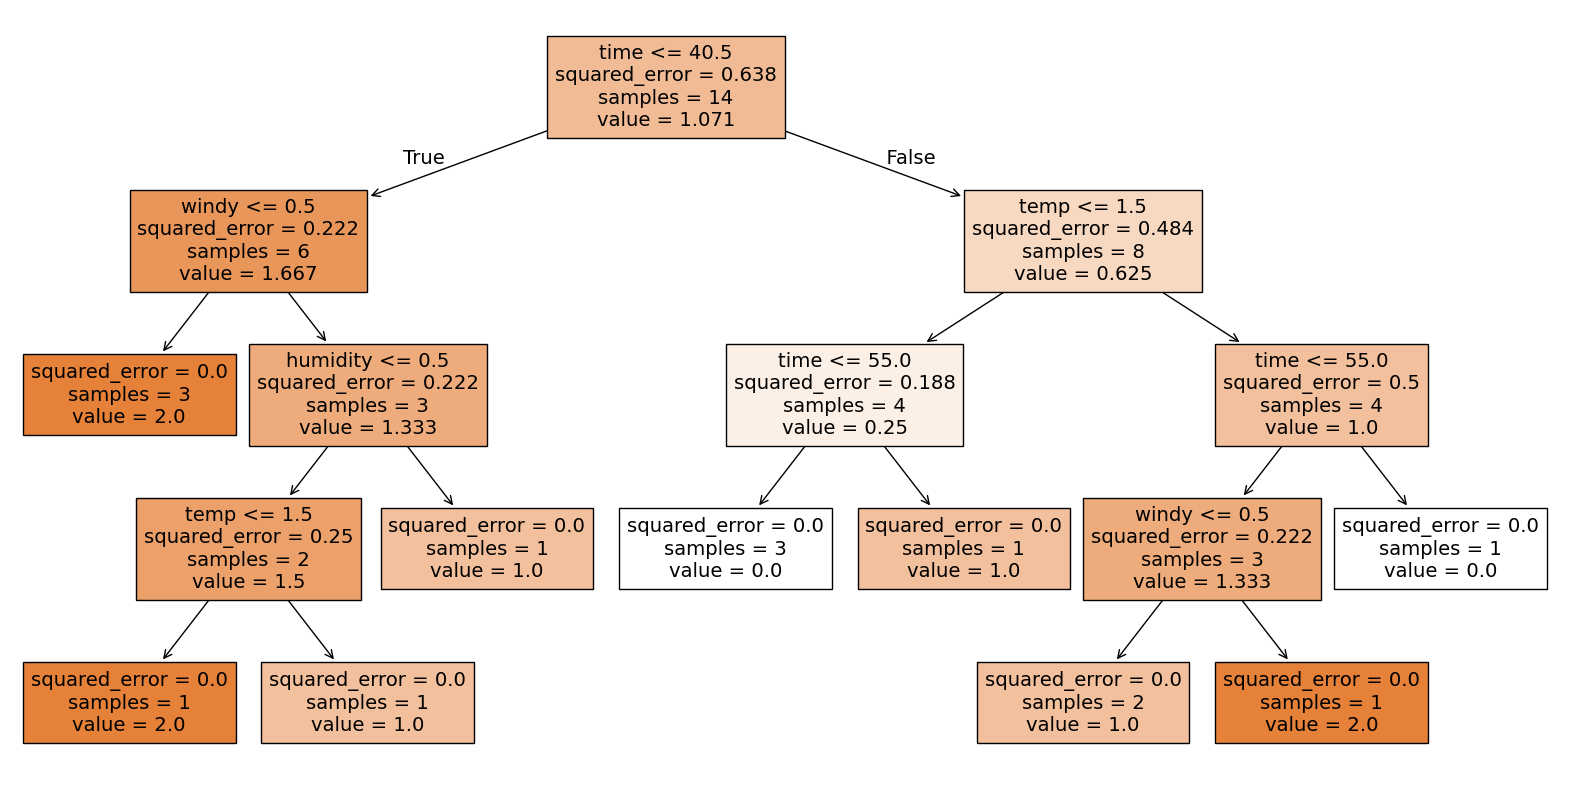

Accuracy: 1.0


In [6]:
# Predict play time for outlook='Sunny', temp='hot', humidity='normal', windy='true'
predicted_play_time = regressor.predict([[0, 1, 0, 1]])
print(f"Predicted play time: {predicted_play_time}")
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(regressor, feature_names=list(X.columns), filled=True)
plt.show()
# Calculate accuracy
y_pred = regressor.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

